In [ ]:
import numpy as np
import os
import cv2
import sys

def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    # Resize the images to the prescribed size
                    if (sz is not None):
                        im = cv2.resize(im, (200, 200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except Exception as e:
                    print(f"Unexpected error: {str(e)}")
            c = c + 1
    return [X, y]

def face_rec():
    names = ['Jairo', 'Jody']  
    dataset_path = r"C:\Users\Jai\DATA SCIENCE 3\Mood Detection\face_dataset"  

    [X, y] = read_images(dataset_path)
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r'C:\Users\Jai\DATA SCIENCE 3\Mood Detection\haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print(f"Prediction error: {str(e)}")
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

# Output

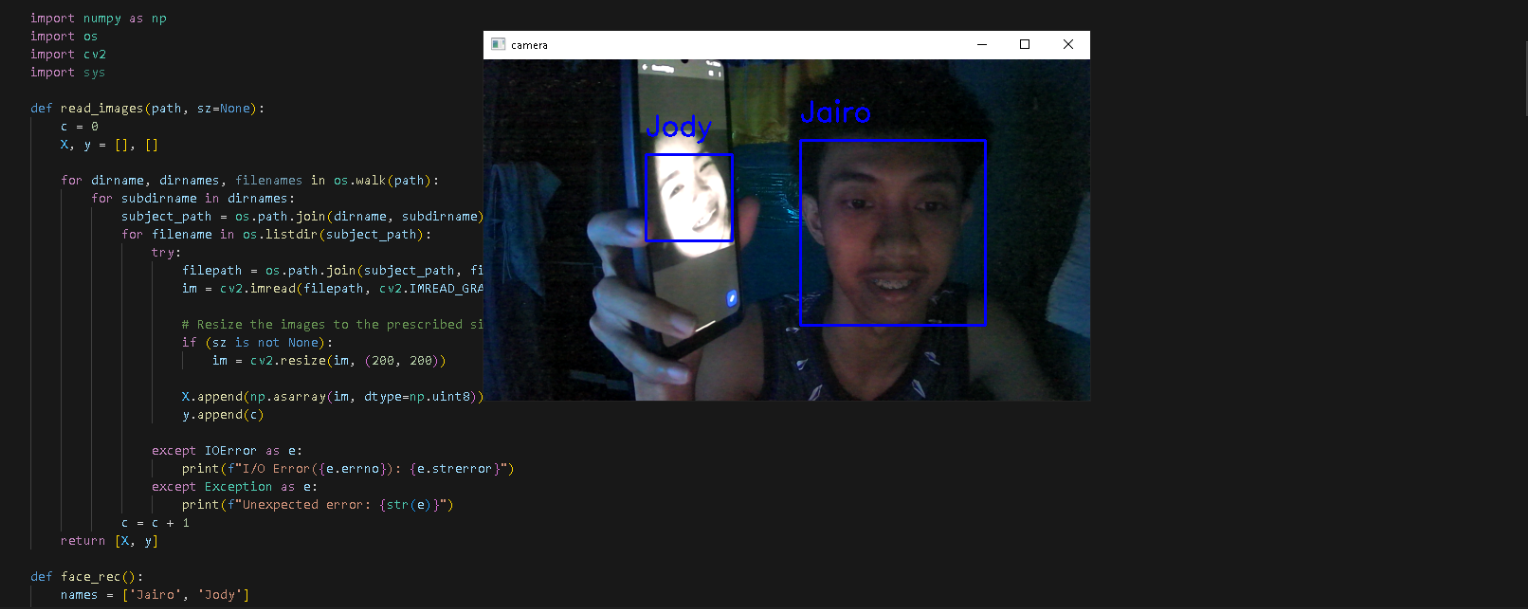

Inference:

It will identify if the other person's face or mine is being used for this procedure. To determine my face or her face in this instance, I utilised Jody's face as an example.